#### <b>Import Libraries

In [553]:
import docx2txt
import pandas as pd
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import os
import mimetypes
from pdfminer.high_level import extract_text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


#### <b>Load Spacy Model

In [554]:
nlp = spacy.load('en_core_web_sm')

#### <b>Check Given file DOCX or PDF or TXT

In [555]:
"""import os
import mimetypes"""

def check_file_type(filename):
    mimetype, _ = mimetypes.guess_type(filename)

    if mimetype == 'application/vnd.openxmlformats-officedocument.wordprocessingml.document':
        return 'DOCX'
    elif mimetype == 'application/pdf':
        return 'PDF'
    elif mimetype == 'text/plain':
        return 'TXT'
    else:
        return 'Unknown'


#### <b>Extract Text From File

In [556]:

def file_extract(filetype):
    #Extract Text from docx
    if filetype == 'DOCX':
        def extract_text_from_docx(docx_path):
            txt = docx2txt.process(docx_path)
            if txt:
                return txt.replace('\t',' ')
            return None
        cv_text= extract_text_from_docx(filename)
        cv_text = " ".join(cv_text.strip().split())

    #Extract Text from pdf
    elif filetype == 'PDF':
        def extract_text_from_pdf(pdf_path):
            return extract_text(pdf_path)

        if __name__== '__main__':
            cv_text=extract_text_from_pdf(filename)
            cv_text = " ".join(cv_text.strip().split())

    #Extract Text from txt
    elif filetype == 'TXT':
        f = open(filename, "r")
        cv_text= f.read() 
     
    return cv_text


#### <b>Load the resume

In [557]:
filename=input("Enter the resume file path: ")

resumefiletype = check_file_type(filename)
print(f'The file {filename} is a {resumefiletype} file.')
resume_text= file_extract(resumefiletype)
resume_text


The file Md Shakil.docx is a DOCX file.


'Md Shakil To work in responsible position where I could use my interpersonal skills creativity and above all my learning experiences in order to develop my career as well as to contribute in any sector. ABOUT ME FATHER NAME Md Bashir MOTHER NAME Halima Begum DATE OF BIRTH 03-Jan-2001 NATIONALITY Bangladeshi RELIGION Islam GENDER Male CONTACT ME PHONE +8801793299882 +8801854619757 NID 6910806337 EMAIL shakil.eub.cse@gmail.com PERMANENT ADDRESS Vill: South Charpata P.O: Medua P.S: Bhola Sodar Dist- Bhola PRESENT ADDRESS Vill: Neymartack P.O: Rajfulbaria P.S: Savar Dist- Dhaka HOBBIES Cricket Coding Traveling Graphic Designing WORK EXPERIENCE COMPUTER INSTRUCTOR Institute : Rainbow Computer Point. Duration : November 2019 to Present EDUCATION QUALIFICATION BACHELOR OF SCIENCE (BSC) University : European University of Bangladesh. Program : Computer Science & Engineering. Semester :10thSemester Running. Current CGPA : 3.97 (out of 4) HIGHER SECONDARY CERTIFICATE Institute : Obaidul Hoque M

#### <b>Load Job Requirements

In [558]:
filename=input("Enter the file path: ")
requirementfiletype = check_file_type(filename)
print(f'The file {filename} is a {requirementfiletype} file.')
requirement_text= file_extract(requirementfiletype)
requirement_text


The file skill.txt is a TXT file.


' python,Statistics,Data Visualization,Linear Algebra,NeuralNetworks,DeepLearning,Sci-kit Learn,Graphic Designing ,Keras,OpenCV,SQLite, Html, CSS, GUIusing Pyqt module, Git, nlp, GitHub, C, C++, Illustrator,photoshop,machine learning,Microsoft Word, Microsoft Excel, Microsoft Power Point'

#### <b>Remove Puncutation

In [559]:
"""doc = nlp(resume_text)

tokens_without_punct = []
for token in doc:
    if not token.is_punct:
        tokens_without_punct.append(token.text)

cv_text = " ".join(tokens_without_punct)
print(cv_text)"""

'doc = nlp(resume_text)\n\ntokens_without_punct = []\nfor token in doc:\n    if not token.is_punct:\n        tokens_without_punct.append(token.text)\n\ncv_text = " ".join(tokens_without_punct)\nprint(cv_text)'

#### <b>Extract Name

In [560]:
print("Extract Name:")
cv_text= resume_text
doc= nlp(cv_text)
for word in doc.ents:
    if word.label_== 'PERSON' and len(word) == 2:
        print(word.text)


Extract Name:
Md Shakil
Md Bashir
Halima Begum
Medua P.S
Rajfulbaria P.S


In [561]:
frequency_dict = {}

cv_text = resume_text
doc = nlp(cv_text)

most_frequent_word = ''
highest_frequency = 0

for word in doc.ents:
    if word.label_ == 'PERSON' and len(word) == 2:
        if word.text in frequency_dict:
            frequency_dict[word.text] += 1
        else:
            frequency_dict[word.text] = 1

        if frequency_dict[word.text] > highest_frequency:
            most_frequent_word = word.text
            highest_frequency = frequency_dict[word.text]

print("Extracted Name:", most_frequent_word)

Extracted Name: Md Shakil


#### <b>Extract Contact info

In [562]:
print("\nExtract Contact Info:")
contactpattern = re.compile(r'[a-zA-Z0-9-\.]+@[a-zA-Z-\.]*\.(com|edu|net|co|org)|\d{11,13}|\d{4,5}-\d{6,7}|\d{4,5}\s\d{6,7}|\+\d{2,3}\s\d{4,5}-\d{6,7}|\+\d{13}|\+\d{7}\s\d{6,7}|\b\d{3}[-.]?\d{3}[-.]?\d{4}\b') 
matchescontact = contactpattern.finditer(cv_text)
for match in matchescontact:
    print(match.group())


Extract Contact Info:
+8801793299882
+8801854619757
6910806337
shakil.eub.cse@gmail.com


In [563]:
"""import re"""

nid=[]
cell=[]
emails=[]
print("\nExtract Contact Info:")
contactpattern_str = r'[a-zA-Z0-9-\.]+@[a-zA-Z-\.]*\.(com|edu|net|co|org)|\d{11,13}|\d{4,5}-\d{6,7}|\d{4,5}\s\d{6,7}|\+\d{2,3}\s\d{4,5}-\d{6,7}|\+\d{13}|\+\d{7}\s\d{6,7}|\b\d{3}[-.]?\d{3}[-.]?\d{4}\b'
num_patterns = contactpattern_str.count('|') + 1
contactpattern = re.compile(contactpattern_str)
matchescontact = contactpattern.finditer(cv_text)
for match in matchescontact:
    if len(match.group()) == 10:
        nid.append(match.group())
    elif '@' in match.group():
        emails.append(match.group())
    else:
        cell.append(match.group())
print("Phone numbers found:",cell)
print("NID numbers found:",nid)
print("Email Address found:",emails)


Extract Contact Info:
Phone numbers found: ['+8801793299882', '+8801854619757']
NID numbers found: ['6910806337']
Email Address found: ['shakil.eub.cse@gmail.com']


#### <b>Extract Result

In [564]:
print("\nExtract Result:")
extracted_results = []
resultp = re.compile(r'(BACHELOR|MASTER|DOCTOR) OF (ARTS|SCIENCE|BUSINESS ADMINISTRATION|LAWS|EDUCATION|MEDICINE AND SURGERY|PHILOSOPHY)|(BACHELOR|MASTER|DOCTOR) OF (ARTS|SCIENCE|BUSINESS ADMINISTRATION|LAWS|EDUCATION|MEDICINE AND SURGERY|PHILOSOPHY) \((BA|BSC|BBA|LLB|BED|MBBS|MA|MSC|MBA|LLM|MED|PHD)\)|(SECONDARY SCHOOL|HIGHER SECONDARY|JUNIOR SCHOOL|PRIMARY SCHOOL|PRIMARY EDUCATION COMPLETION|MADRASAH EDUCATION)\s+(CERTIFICATE|COMPLETION) \((S.S.C|H.S.C|J.S.C|P.S.C|P.E.C|M.E.C)|(S S C|H S C|J S C|P S C|P E C|M E C)\)|(Secondary School|Higher Secondary|Junior School|Primary School|Primary Education Completion|Madrasah Education)\S+(Certificate|Completion)|(SECONDARY SCHOOL|HIGHER SECONDARY|JUNIOR SCHOOL|PRIMARY SCHOOL|PRIMARY EDUCATION COMPLETION|MADRASAH EDUCATION)\s+(CERTIFICATE|COMPLETION)|(Bachelor|Master|Doctor)|(Bachelor|Master|Doctor) of (Arts|Science|Business Administration|Laws|Education|Medicine and Surgery|Philosophy) \((BA|BSc|BBA|LLB|BEd|MBBS|MA|MSc|MBA|LLM|MEd|PhD)\)|(Secondary School|Higher Secondary|Junior School|Primary School|Primary Education Completion|Madrasah Education) (Certificate|Completion) \((S.S.C|H.S.C|J.S.C|P.S.C|P.E.C|M.E.C)\)|(GPA)\s+\d{1,2}.\d{1,2}|(GPA):\s+\d{1,2}.\d{1,2}|(GPA)\s+:\d{1,2}.\d{1,2}|(GPA)\s+:\s+\d{1,2}.\d{1,2}|(GPA):\d{1,2}.\d{1,2}|(GPA)\d{1,2}.\d{1,2}|(G.P.A)\s+\d{1,2}.\d{1,2}|(G.P.A):\s+\d{1,2}.\d{1,2}|(G.P.A)\s+:\d{1,2}.\d{1,2}|(G.P.A)\s+:\s+\d{1,2}.\d{1,2}|(G.P.A):\d{1,2}.\d{1,2}|(G.P.A)\d{1,2}.\d{1,2}|(gpa)\s+\d{1,2}.\d{1,2}|(gpa):\s+\d{1,2}.\d{1,2}|(gpa)\s+:\d{1,2}.\d{1,2}|(gpa)\s+:\s+\d{1,2}.\d{1,2}|(gpa):\d{1,2}.\d{1,2}|(gpa)\d{1,2}.\d{1,2}|(g.p.a)\s+\d{1,2}.\d{1,2}|(g.p.a):\s+\d{1,2}.\d{1,2}|(g.p.a)\s+:\d{1,2}.\d{1,2}|(g.p.a)\s+:\s+\d{1,2}.\d{1,2}|(g.p.a):\d{1,2}.\d{1,2}|(g.p.a)\d{1,2}.\d{1,2}|(CGPA)\s+\d{1,2}.\d{1,2}|(CGPA):\s+\d{1,2}.\d{1,2}|(CGPA)\s+:\d{1,2}.\d{1,2}|(CGPA)\s+:\s+\d{1,2}.\d{1,2}|(CGPA):\d{1,2}.\d{1,2}|(CGPA)\d{1,2}.\d{1,2}|(C.G.P.A)\s+\d{1,2}.\d{1,2}|(C.G.P.A):\s+\d{1,2}.\d{1,2}|(C.G.P.A)\s+:\d{1,2}.\d{1,2}|(C.G.P.A)\s+:\s+\d{1,2}.\d{1,2}|(C.G.P.A):\d{1,2}.\d{1,2}|(C.G.P.A)\d{1,2}.\d{1,2}|(cgpa)\s+\d{1,2}.\d{1,2}|(cgpa):\s+\d{1,2}.\d{1,2}|(cgpa)\s+:\d{1,2}.\d{1,2}|(cgpa)\s+:\s+\d{1,2}.\d{1,2}|(cgpa):\d{1,2}.\d{1,2}|(cgpa)\d{1,2}.\d{1,2}|(c.g.p.a)\s+\d{1,2}.\d{1,2}|(c.g.p.a):\s+\d{1,2}.\d{1,2}|(c.g.p.a)\s+:\d{1,2}.\d{1,2}|(c.g.p.a)\s+:\s+\d{1,2}.\d{1,2}|(c.g.p.a):\d{1,2}.\d{1,2}|(c.g.p.a)\d{1,2}.\d{1,2}|(RESULT)\s+\d{1,2}.\d{1,2}|(RESULT):\s+\d{1,2}.\d{1,2}|(RESULT)\s+:\d{1,2}.\d{1,2}|(RESULT)\s+:\s+\d{1,2}.\d{1,2}|(RESULT):\d{1,2}.\d{1,2}|(RESULT)\d{1,2}.\d{1,2}|(result)\s+\d{1,2}.\d{1,2}|(result):\s+\d{1,2}.\d{1,2}|(result)\s+:\d{1,2}.\d{1,2}|(result)\s+:\s+\d{1,2}.\d{1,2}|(result):\d{1,2}.\d{1,2}|(result)\d{1,2}.\d{1,2}|(Result)\s+\d{1,2}.\d{1,2}|(Result):\s+\d{1,2}.\d{1,2}|(Result)\s+:\d{1,2}.\d{1,2}|(Result)\s+:\s+\d{1,2}.\d{1,2}|(Result):\d{1,2}.\d{1,2}|(Result)\d{1,2}.\d{1,2}') #Extract result
matchesresult = resultp.finditer(cv_text)
for match in matchesresult:
    extracted_results.append(match.group(0))
    print(match.group(0))



Extract Result:
BACHELOR OF SCIENCE
CGPA : 3.97
HIGHER SECONDARY CERTIFICATE
GPA : 3.00
SECONDARY SCHOOL CERTIFICATE
GPA :4.23


#### <b>Extract the skills

In [565]:
requirement_text=requirement_text.lower()
SKILLS= [elem.strip() for elem in requirement_text.split(",")]
print(SKILLS)

['python', 'statistics', 'data visualization', 'linear algebra', 'neuralnetworks', 'deeplearning', 'sci-kit learn', 'graphic designing', 'keras', 'opencv', 'sqlite', 'html', 'css', 'guiusing pyqt module', 'git', 'nlp', 'github', 'c', 'c++', 'illustrator', 'photoshop', 'machine learning', 'microsoft word', 'microsoft excel', 'microsoft power point']


In [566]:
import spacy

class SkillsExtractor:
    def __init__(self, skills_list=None):
        self.__nlp = spacy.load("en_core_web_sm")
        self.__skills_list = skills_list

    def extract_skills(self, text):
        skills = []
        nlp_text = self.__nlp(text)
        for token in nlp_text:
            if token.text.lower() in self.__skills_list:
                skills.append(token.text.title())

        # Handle bigrams and trigrams
        for i in range(len(nlp_text) - 1):
            bigram = nlp_text[i:i+2]
            if " ".join([token.text.lower() for token in bigram]) in self.__skills_list:
                skills.append(" ".join([token.text.title() for token in bigram]))

        for i in range(len(nlp_text) - 2):
            trigram = nlp_text[i:i+3]
            if " ".join([token.text.lower() for token in trigram]) in self.__skills_list:
                skills.append(" ".join([token.text.title() for token in trigram]))

        return list(set(skills))

def extract_resume_skills(resume_text, skills_list):
    extractor = SkillsExtractor(skills_list)
    return extractor.extract_skills(resume_text)

resume_text = cv_text
skills_list = SKILLS
resume_skills = extract_resume_skills(resume_text, skills_list)

print("Skills mentioned in the resume:")
for skill in resume_skills:
    print("- " + skill)


Skills mentioned in the resume:
- Github
- Machine Learning
- Python
- Illustrator
- Graphic Designing
- Microsoft Power Point
- Nlp
- C
- Microsoft Word
- Microsoft Excel
- Html
- Photoshop
- Css


#### <b>Skills similarity in percent

Skills Percent similarity: 76.51%


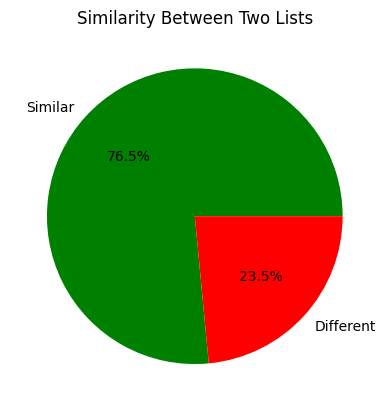

In [567]:
requirementskills = ', '.join(SKILLS).lower()
resumeskills = ', '.join(resume_skills).lower()

vectorizer = CountVectorizer().fit_transform([requirementskills, resumeskills])
vectorized_strings = vectorizer.toarray()

cosine_sim = cosine_similarity(vectorized_strings)

percent_sim = cosine_sim[0][1] * 100

print("Skills Percent similarity: {:.2f}%".format(percent_sim))
#Pi-Chart
percent_diff = 100 - percent_sim
data = [percent_sim, percent_diff]

labels = ["Similar", "Different"]
colors = ["green", "red"]

plt.pie(data, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Similarity Between Two Lists")
plt.show()
